# Import Dataset

In [550]:
import pandas as pd

df = pd.read_csv('data/train.csv')

In [551]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [554]:
df.shape

(891, 12)

# Preprocessing
## Drop not interesting columns

In [575]:
df = df.drop(['Cabin', 'Ticket'], axis=1)

## Sex

In [594]:
df['Sex'].unique()

array([0, 1])

In [556]:
def get_gender(x):
    if x == 'male':
        return 0
    return 1

In [557]:
df['Sex'] = df['Sex'].apply(lambda x : get_gender(x))

## Age

In [558]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Function for min max scaler

In [559]:
from sklearn.preprocessing import MinMaxScaler

def scale_column(column, df, nan=False):
    values = df[column].values
    
    scaler = MinMaxScaler()
    if nan:
        # also add values in the test set
        new_values = np.append(values,0)
        scaler.fit(new_values.reshape(-1, 1))
    else:
        scaler.fit(values.reshape(-1, 1))
    return scaler.transform(values.reshape(-1, 1))

In [560]:
df['Age'] = scale_column('Age', df, nan=True)

In [561]:
df['Age'].unique()

array([0.275   , 0.475   , 0.325   , 0.4375  ,      nan, 0.675   ,
       0.025   , 0.3375  , 0.175   , 0.05    , 0.725   , 0.25    ,
       0.4875  , 0.6875  , 0.3875  , 0.425   , 0.1875  , 0.35    ,
       0.1     , 0.2375  , 0.5     , 0.825   , 0.525   , 0.2625  ,
       0.225   , 0.0375  , 0.0875  , 0.6125  , 0.3625  , 0.8125  ,
       0.35625 , 0.0625  , 0.1375  , 0.5625  , 0.2125  , 0.4     ,
       0.2     , 0.3125  , 0.010375, 0.375   , 0.4125  , 0.2875  ,
       0.3     , 0.575   , 0.7375  , 0.8875  , 0.4625  , 0.5875  ,
       0.18125 , 0.88125 , 0.40625 , 0.15    , 0.1125  , 0.45625 ,
       0.6375  , 0.69375 , 0.50625 , 0.55    , 0.0125  , 0.7625  ,
       0.7     , 0.625   , 0.45    , 0.56875 , 0.25625 , 0.775   ,
       0.5125  , 0.65    , 0.7875  , 0.29375 , 0.0115  , 0.5375  ,
       0.75    , 0.125   , 0.8     , 0.1625  , 0.6     , 0.009375,
       0.6625  , 0.7125  , 1.      , 0.875   , 0.30625 , 0.075   ,
       0.008375, 0.38125 , 0.00525 , 0.43125 , 0.925   ])

## Parch

In [562]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

Min Max Scaler

In [563]:
df['Parch'] = scale_column('Parch', df)

## Fare

In [564]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [565]:
df['Fare'] = scale_column('Fare', df, nan=True)

## Pclass

In [566]:
df['Pclass'].unique()

array([3, 1, 2])

In [567]:
df['Pclass'] = scale_column('Pclass', df)

## SibSp

In [568]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [569]:
df['SibSp'] = scale_column('SibSp', df)

## Embarked

In [570]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [571]:
df['Embarked'] = df['Embarked'].fillna(value='N')

In [572]:
def get_embarked(x):
    if x == 'C':
        return 0
    if x == 'S':
        return 0.25
    if x == 'Q':
        return 0.5
    return 1

In [573]:
df['Embarked'] = df['Embarked'].apply(lambda x : get_embarked(x))

## drop remaining nan values

In [581]:
df = df.dropna()

In [582]:
df.shape

(714, 10)

# Training test Split

In [583]:
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [584]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [585]:
X_train.shape

(478, 5)

# Train the model

In [586]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

classifier = KNeighborsClassifier()
parameters = {  'n_neighbors'   : np.arange(3, 8),
                'weights'       : ['uniform', 'distance'],
                'metric'        : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                'algorithm'     : ['auto', 'ball_tree', 'kd_tree'],
            }
clf = GridSearchCV(classifier, parameters, cv = 5)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([3, 4, 5, 6, 7]),
                         'weights': ['uniform', 'distance']})

In [587]:
model = clf.best_estimator_

In [588]:
model

KNeighborsClassifier(metric='manhattan', weights='distance')

# Save the Model

In [589]:
import pickle
pickle.dump(model, open("output/knn.sav", 'wb'))

# Load the saved model

In [590]:
# open a file, where you stored the pickled data
file = open('output/knn.sav', 'rb')

# dump information to that file
loaded_model = pickle.load(file)

# Predict Test

In [591]:
y_score = model.predict_proba(X_test)

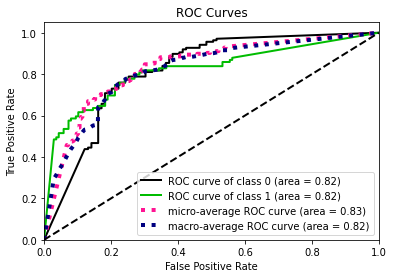

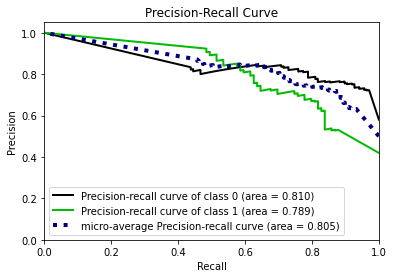

In [592]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc,auc
from scikitplot.metrics import plot_precision_recall


# Plot metrics 
plot_roc(y_test.values.ravel(), y_score)
plt.savefig('output/roc.png')
plt.show()
    
plot_precision_recall(y_test.values.ravel(), y_score)
plt.savefig('output/pr.png')
plt.show()

In [593]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = model.predict(X_test)
precision = precision_score(y_test.values.ravel(),y_pred, average='weighted')
recall = recall_score(y_test.values.ravel(),y_pred, average='weighted')
accuracy = accuracy_score(y_test.values.ravel(),y_pred)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('Accuracy: ' , accuracy)

Precision:  0.7536200639348735
Recall:  0.7542372881355932
Accuracy:  0.7542372881355932


# Finalise the model
Train again the model on all the samples

In [595]:
model.fit(X, y.values.ravel())

KNeighborsClassifier(metric='manhattan', weights='distance')

# Predict Unseen

In [596]:
df2 = pd.read_csv('data/test.csv')

## preprocess test set

In [597]:
df2['Embarked'] = df2['Embarked'].fillna(value='N')
df2['Age'] = df2['Age'].fillna(value=0)
df2['Fare'] = df2['Fare'].fillna(value=0)


df2['Sex'] = df2['Sex'].apply(lambda x : get_gender(x))
df2['Embarked'] = df2['Embarked'].apply(lambda x : get_embarked(x))


for i in ['Age', 'Parch', 'Fare', 'Pclass', 'SibSp']:
    df2[i] = scale_column(i, df2)

In [536]:
X_test = df2[features]

In [537]:
X_test.shape

(418, 7)

In [538]:
X_test['Fare'].unique()

array([0.01528158, 0.01366309, 0.01890874, 0.01690807, 0.0239836 ,
       0.018006  , 0.01489121, 0.05660423, 0.01411046, 0.04713766,
       0.01541158, 0.05074862, 0.1605739 , 0.11940565, 0.0541074 ,
       0.02410559, 0.01410226, 0.01546857, 0.11594108, 0.00618899,
       0.06184168, 0.11980422, 0.51212189, 0.02830212, 0.12097534,
       0.05953204, 0.04231498, 0.06148391, 0.04015973, 0.04577135,
       0.11272049, 0.01571255, 0.01854277, 0.11027246, 0.02618765,
       0.05182215, 0.01532218, 0.02537431, 0.10257897, 0.05797054,
       0.01512699, 0.14891148, 0.03103473, 0.1171122 , 0.02934305,
       0.04489301, 0.51334181, 0.03040857, 0.05684821, 0.01493181,
       0.03142511, 0.02635025, 0.0150782 , 0.04098927, 0.01537917,
       0.08275929, 0.05570149, 0.41282051, 0.05016306, 0.02975782,
       0.43288417, 0.02090121, 0.02821272, 0.02713099, 0.01517579,
       0.10149724, 0.01521639, 0.15390495, 0.01533038, 0.10821499,
       0.01662349, 0.04396587, 0.01526518, 0.01700567, 0.02936

In [539]:
y_pred = model.predict(X_test)

## Save results

In [540]:
res = pd.DataFrame(df2['PassengerId'])

In [541]:
res.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [544]:
res['Survived'] = y_pred

In [549]:
res.to_csv('output/submitted.csv')